# #CITS5508 Lab03   Project 1
ZIMIN MENG 22665473

This data contains 8 features and 336 instances about the Cellular Localization Sites of Proteins. In this project, we are trying to use a Voting classifier which contains SVM classifier, Logistic Regression classifier and Gradient Descent classifier to perform the classification task and we actually have quite good result since we have a f1 score of 0.909 for voting classifier. 

In [78]:
import pandas as pd
original_data = pd.read_csv('ecoli.data', header = None, delim_whitespace = True, names =['Sequence Name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'Class'])
original_data.head()

,Sequence Name,mcg,gvh,lip,chg,aac,alm1,alm2,Class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [79]:
original_data['Class'].value_counts()

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: Class, dtype: int64

From the result showing above, we could see that class 'omL', 'imL', 'imS' has less than 10 instance which means we need to remove these classes from our data set.

In [80]:
drop_list = []
order = 0
for i in original_data['Class']:
    if i in ['omL', 'imL', 'imS']:
        drop_list.append(order)
    order += 1
new_data = original_data.drop(drop_list).reset_index(drop = True)
new_data['Class'].value_counts()
new_data.head()

,Sequence Name,mcg,gvh,lip,chg,aac,alm1,alm2,Class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


Data Visualization


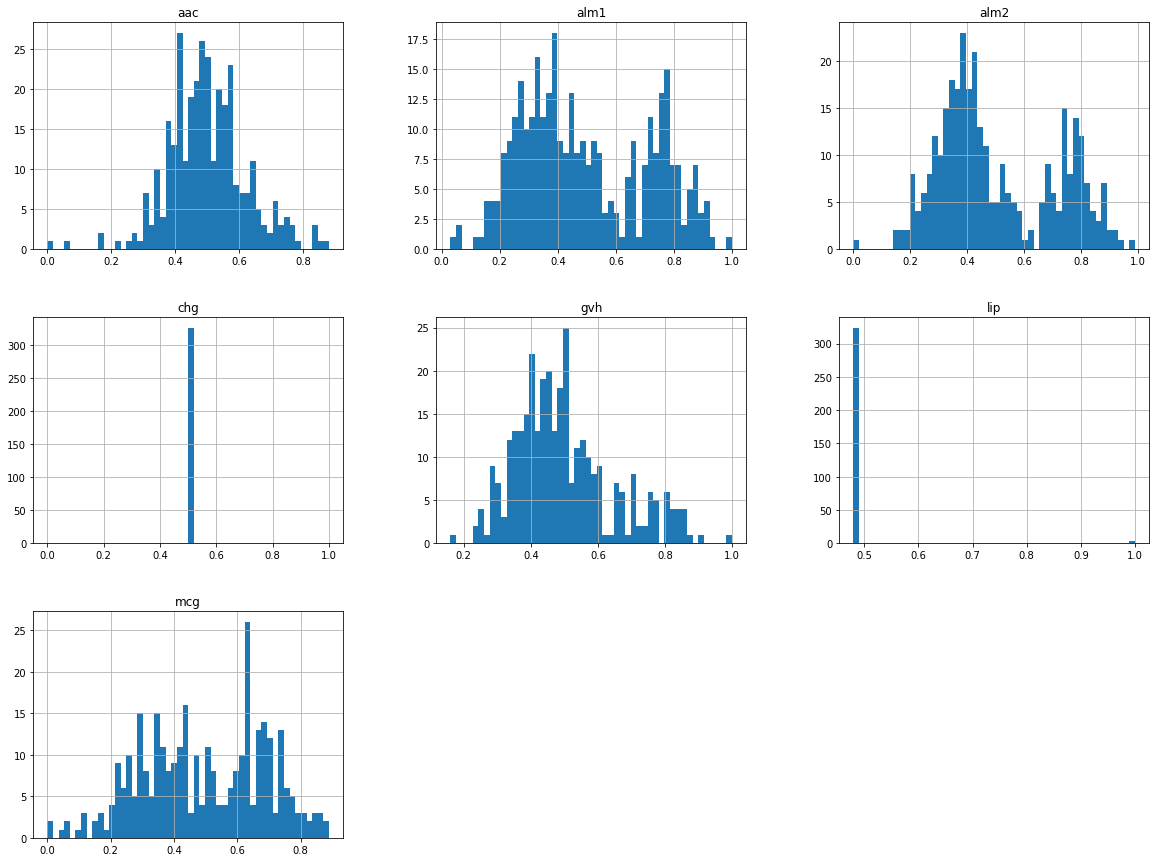

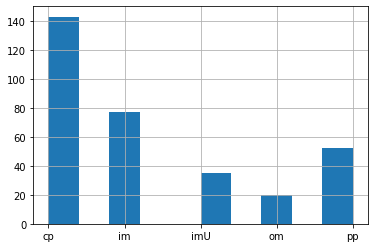

In [81]:
#Data Visualization

%matplotlib inline
import matplotlib.pyplot as plt
new_data.hist(bins = 50, figsize=(20,15))
plt.show()

new_data['Class'].hist()

The above graph shows the histogram for each numerical attributes and therefore 'Sequence Name' is excluded (although we can encode it but since it's just the accession number which will not influence our classification result). And also we could see that attributes 'chg' and 'lip' are constant values which indicates we can remove these two attributes for the following classification to help improve the running speed since it won't influence the results. 

In [82]:
#Dropping useless colunms
data_clf = new_data.drop(['Sequence Name', 'chg', 'lip'], axis =1)
data_clf.head()

,mcg,gvh,aac,alm1,alm2,Class
0,0.49,0.29,0.56,0.24,0.35,cp
1,0.07,0.40,0.54,0.35,0.44,cp
2,0.56,0.40,0.49,0.37,0.46,cp
3,0.59,0.49,0.52,0.45,0.36,cp
4,0.23,0.32,0.55,0.25,0.35,cp


### Data Spliting

In [124]:
#Performing 80/20 split of data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_clf, test_size=0.2, random_state=42)

def split_label(data_set):
    class_set = data_set['Class']
    new_set = data_set.drop('Class', axis = 1)
    return new_set, class_set
            
train_x, train_y = split_label(train_set)
test_x, test_y = split_label(test_set)

# Data normalization

As mentioned before, in this project we need to perform a Voting classifier which includes SVM classifier, logistic regression classifier and gradient descent classifier. All these three algorithms can perform better if the attributes is standardized. By doing so, we using MinMaxScaler to gain a standardized training set and testing set.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29433bd0>,
      dtype=object)

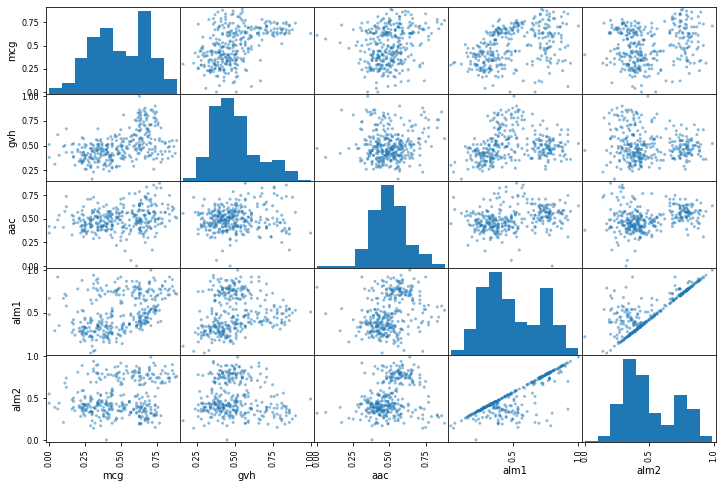

In [125]:
from pandas.plotting import scatter_matrix
attr = ['mcg', 'gvh', 'aac', 'alm1', 'alm2']
scatter_matrix(data_clf[attr], figsize=(12, 8))

By running the Voting classifier with default values and hard voting methods, we gain a voting score of 

In [126]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

log_clf = LogisticRegression() 
sgd_clf = SGDClassifier() 
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('sgd', sgd_clf), ('svc', svm_clf)], voting='hard')

voting_clf.fit(train_x, train_y)
voting_clf.score(test_x, test_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8333333333333334

In [127]:
#looking at each classifier's accuracy, F1 Score and confusion matrix on the test set
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

for clf in (log_clf, sgd_clf, svm_clf, voting_clf):
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    f1 = f1_score(test_y, y_pred, average = 'weighted')
    conf_matr = confusion_matrix(test_y, y_pred)
    print(
        clf.__class__.__name__, "accuracy score is" ,accuracy_score(test_y, y_pred),
         "f1 score is", f1, 
         "confusion matrix is:", conf_matr)

LogisticRegression accuracy score is 0.8333333333333334 f1 score is 0.7908229877539339 confusion matrix is: [[30  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  5  1  0  0]
 [ 2  0  0  0  1]
 [ 2  0  0  0 10]]
SGDClassifier accuracy score is 0.8636363636363636 f1 score is 0.8642485460667279 confusion matrix is: [[30  0  0  0  0]
 [ 1 11  3  0  0]
 [ 0  1  4  0  1]
 [ 0  0  0  3  0]
 [ 2  0  1  0  9]]
SVC accuracy score is 0.8181818181818182 f1 score is 0.759469696969697 confusion matrix is: [[30  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  6  0  0  0]
 [ 1  0  0  0  2]
 [ 2  0  0  0 10]]
VotingClassifier accuracy score is 0.8333333333333334 f1 score is 0.7908229877539339 confusion matrix is: [[30  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  5  1  0  0]
 [ 2  0  0  0  1]
 [ 2  0  0  0 10]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anacon

In [133]:
#Changing the hyperparameter of the classifiers to see whether will improve the performance or not
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

log_clf = LogisticRegression() 
sgd_clf = SGDClassifier() 
svm_clf = SVC(C=5, kernel = 'rbf', gamma = 'auto')
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('sgd', sgd_clf), ('svc', svm_clf)], voting='hard')

voting_clf.fit(train_x, train_y)
voting_clf.score(test_x, test_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9090909090909091

In [134]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

for clf in (log_clf, sgd_clf, svm_clf, voting_clf):
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    f1 = f1_score(test_y, y_pred, average = 'weighted')
    conf_matr = confusion_matrix(test_y, y_pred)
    print(
        clf.__class__.__name__, "accuracy score is" ,accuracy_score(test_y, y_pred),
         "f1 score is", f1, 
         "confusion matrix is:", conf_matr)

LogisticRegression accuracy score is 0.8333333333333334 f1 score is 0.7908229877539339 confusion matrix is: [[30  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  5  1  0  0]
 [ 2  0  0  0  1]
 [ 2  0  0  0 10]]
SGDClassifier accuracy score is 0.7727272727272727 f1 score is 0.7564460393407763 confusion matrix is: [[27  3  0  0  0]
 [ 0 15  0  0  0]
 [ 0  5  1  0  0]
 [ 1  0  1  1  0]
 [ 2  2  1  0  7]]
SVC accuracy score is 0.9242424242424242 f1 score is 0.9187199838497174 confusion matrix is: [[30  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  3  3  0  0]
 [ 0  0  0  3  0]
 [ 1  0  0  0 11]]
VotingClassifier accuracy score is 0.8939393939393939 f1 score is 0.8723900882551159 confusion matrix is: [[30  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  5  1  0  0]
 [ 0  0  0  3  0]
 [ 1  0  0  0 11]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_cl

We reperform the Voting classifier by changing some hypermeters of SVM classifier, the result of voting score increasing to 0.909 which actually shows the evidence that with changing hypermeters, the performance for voting classifier can actually be improved. However, interesting thing is after changing hypermeters for SVM, it performs even better than Voting classifier with a highest f1 score of 0.9187 whereas voting classifier is just 0.87. 

LogisticRegression confusion matrix is: [[30  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  5  1  0  0]
 [ 2  0  0  0  1]
 [ 2  0  0  0 10]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


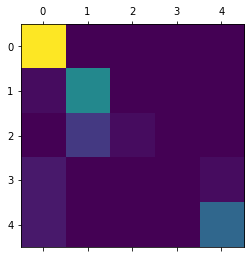

SGDClassifier confusion matrix is: [[30  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  4  2  0  0]
 [ 0  0  0  3  0]
 [ 2  1  1  0  8]]


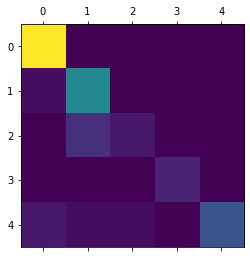

SVC confusion matrix is: [[30  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  3  3  0  0]
 [ 0  0  0  3  0]
 [ 1  0  0  0 11]]


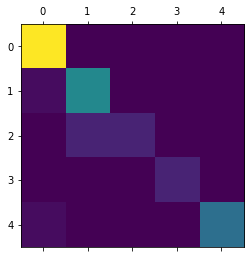

VotingClassifier confusion matrix is: [[30  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  3  3  0  0]
 [ 0  0  0  3  0]
 [ 2  0  0  0 10]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


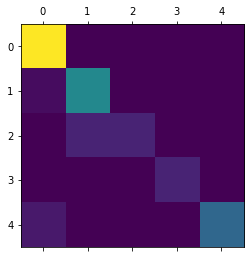

In [131]:
#Plot Confusion Matrices
from sklearn.metrics import confusion_matrix

for clf in (log_clf, sgd_clf, svm_clf, voting_clf):
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    conf_matr = confusion_matrix(test_y, y_pred)
    print(
        clf.__class__.__name__, 
         "confusion matrix is:", conf_matr)
    plt.matshow(conf_matr)
    plt.show()

In general, these confusion matrixs looks fairly good since most images are on the main diagonal, which means that they were classified correctly.